# Miniproyecto 1: Data Science Junior E-commerce


# Preámbulo

In [38]:
# Machine Learning
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from datetime import timedelta

# General Data Science
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Esta configuración permite que los dataframes se muestren completos.
pd.set_option('display.max_columns', None)

# 1. El líder de equipo necesitará explicar qué información contiene la base de datos al CEO de la empresa. ¿Se podria explicar qué información contienen los datos?

📖 **Referencia Externa:** [Método `join`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html).

---

✅ **Explicación:** La base de datos contiene información organizada en tres tablas principales:

- **Ordenes**: Detalles de los pedidos realizados, como cliente, producto y fecha de compra.
- **Productos**: Información sobre los productos adquiridos, como precio y categoría.
- **Entregas**: Datos sobre los envíos, incluyendo las fechas de entrega real y estimada.

Estas tablas están relacionadas por un identificador común y se combinan con el método `join`, lo que permite consolidar toda la información relevante en un solo lugar. Esto ayuda a entender el comportamiento de los clientes y a optimizar las operaciones de la empresa.

In [2]:
order = pd.read_csv("raw_ecommerce_order.csv")
order.head(2)

,Unnamed: 0,city,payment,seller,estimated_delivery,state,rating,customer,order
0,0,campinas,credit card,2.0,2018-01-30,SP,4.5,27313.0,27313.0
1,1,UNKNOWN,OTHER,7.0,2017-04-17 12:00:00,SP,1.0,47584.0,47584.0


In [4]:
product = pd.read_csv("raw_ecommerce_product.csv")
product.head(2)

,Unnamed: 0,precio,shipping,product,customer,category,seller,order
0,0,232.99,86.85,5.0,31453.0,toys,21.0,31453.0
1,1,383.5,2.94,5.0,55708.0,technology,10.0,55708.0


In [3]:
delivery = pd.read_csv("raw_ecommerce_delivery.csv")
delivery.head(2)

,Unnamed: 0,order,purchased,delivered,shipping,estimated_delivery,product
0,0,23487.0,2018-03-10 23:29:10,2018-03-23 15:58:23,133.52,NaN,6.0
1,1,11275.0,2018-01-19 13:39:35,2018-02-01 17:22:51,31.94,2018-02-15 12:00:00,7.0


In [6]:
# Join entre 'order' y 'product' con sufijos para columnas duplicadas
df = order.join(product.set_index('order'), on='order', lsuffix='_order', rsuffix='_product')

# Join con 'delivery' con sufijos adicionales
df = df.join(delivery.set_index('order'), on='order', rsuffix='_delivery')

# Mostrar las primeras filas
df.head(2)


,Unnamed: 0_order,city,payment,seller_order,estimated_delivery,state,rating,customer_order,order,Unnamed: 0_product,...,product,customer_product,category,seller_product,Unnamed: 0,purchased,delivered,shipping_delivery,estimated_delivery_delivery,product_delivery
0,0,campinas,credit card,2.0,2018-01-30,SP,4.5,27313.0,27313.0,1006,...,8.0,27313.0,technology,2.0,1346,2018-01-14 22:31:54,2018-01-22 16:03:40,58.02,2018-01-30,8.0
1,1,UNKNOWN,OTHER,7.0,2017-04-17 12:00:00,SP,1.0,47584.0,47584.0,942,...,0.0,47584.0,fashion,7.0,90,2017-03-25 15:33:43,VALORES EM FALTA,55.54,2017-04-17 12:00:00,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7987 entries, 0 to 1800
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0_order             7987 non-null   int64  
 1   city                         7614 non-null   object 
 2   payment                      7556 non-null   object 
 3   seller_order                 7987 non-null   float64
 4   estimated_delivery           7172 non-null   object 
 5   state                        7646 non-null   object 
 6   rating                       7586 non-null   object 
 7   customer_order               7987 non-null   float64
 8   order                        7987 non-null   float64
 9   Unnamed: 0_product           7987 non-null   int64  
 10  precio                       7719 non-null   object 
 11  shipping                     7662 non-null   object 
 12  product                      7987 non-null   float64
 13  customer_product       

In [8]:
drop_columns = [
    'city',  # Ejemplo: Si no se necesita la ciudad
    'payment',  # Método de pago innecesario
    'state',  # Columna redundante si no es analizada
    'shipping_x',  # Evitar columnas duplicadas después del join
    'shipping_y'
]

df.drop(columns=drop_columns, inplace=True, errors='ignore')
df.head(2)

,Unnamed: 0_order,seller_order,estimated_delivery,rating,customer_order,order,Unnamed: 0_product,precio,shipping,product,customer_product,category,seller_product,Unnamed: 0,purchased,delivered,shipping_delivery,estimated_delivery_delivery,product_delivery
0,0,2.0,2018-01-30,4.5,27313.0,27313.0,1006,1094.04,58.02,8.0,27313.0,technology,2.0,1346,2018-01-14 22:31:54,2018-01-22 16:03:40,58.02,2018-01-30,8.0
1,1,7.0,2017-04-17 12:00:00,1.0,47584.0,47584.0,942,76.6,55.54,0.0,47584.0,fashion,7.0,90,2017-03-25 15:33:43,VALORES EM FALTA,55.54,2017-04-17 12:00:00,0.0


In [10]:
print(df.columns)

Index(['Unnamed: 0_order', 'seller_order', 'estimated_delivery', 'rating',
       'customer_order', 'order', 'Unnamed: 0_product', 'precio', 'shipping',
       'product', 'customer_product', 'category', 'seller_product',
       'Unnamed: 0', 'purchased', 'delivered', 'shipping_delivery',
       'estimated_delivery_delivery', 'product_delivery'],
      dtype='object')


In [11]:
correct_order = [
    'order',  # Identificador principal
    'product',  # Producto relacionado
    'precio',  # Precio del producto
    'category',  # Categoría del producto
    'purchased',  # Fecha de compra
    'delivered',  # Fecha de entrega
    'estimated_delivery',  # Fecha de entrega estimada
    'rating',  # Calificación del cliente
    'customer_order'  # ID del cliente
]

df = df[correct_order]
df.head(2)


,order,product,precio,category,purchased,delivered,estimated_delivery,rating,customer_order
0,27313.0,8.0,1094.04,technology,2018-01-14 22:31:54,2018-01-22 16:03:40,2018-01-30,4.5,27313.0
1,47584.0,0.0,76.6,fashion,2017-03-25 15:33:43,VALORES EM FALTA,2017-04-17 12:00:00,1.0,47584.0


# 2. ¡Habemus data! Los datos estan muy sucios y hay que corregirlos.

📖 **Referencia Externa:** [Pandas Data Preprocessing](https://medium.com/@sujathamudadla1213/pandas-data-preprocessing-methods-e4fcee1de88b).

---

✅ **Explicación:** Para limpiar los datos y corregir problemas comunes:

1. **Valores Faltantes**: Identificamos y unificamos los valores faltantes, reemplazándolos con valores significativos o eliminándolos si son irrelevantes.
2. **Duplicados**: Eliminamos filas duplicadas para evitar inconsistencias en el análisis.
3. **Tipos de Datos**: Convertimos las columnas a los tipos de datos correctos (por ejemplo, números y fechas).
4. **Errores de Formato**: Corregimos columnas con formatos incorrectos, como precios con símbolos o texto.

Este proceso asegura que los datos sean consistentes y estén listos para análisis más profundos.

In [12]:
# Tu código debería producir un dataframe similar a `output`.
# No te preocupes si son ligeramente diferentes.
# Por ejemplo: Las fechas podrían ser ligeramente diferentes. Mismo día, diferentes segundos.
output = pd.read_csv('output.csv')
print(f'{output.shape[0]} filas y {output.shape[1]} columnas.')
output

945 filas y 14 columnas.


,order,product,seller,customer,city,state,category,price,shipping,payment,purchased,delivered,estimated_delivery,rating
0,18,7,1,18,belo horizonte,mg,health,692.00,11.36,other,2017-03-07 19:19:19,2017-03-21 10:41:53,2017-03-08 16:38:19,4.0
1,134,9,13,134,unknown,sp,technology,97.07,13.25,credit card,2018-02-12 14:14:43,2018-02-16 10:22:35,2018-03-01 12:00:00,4.5
2,157,12,10,157,sao paulo,sp,health,95.03,39.84,credit card,2018-04-08 14:03:56,2018-04-10 20:34:41,2018-04-09 11:22:56,2.5
3,190,2,9,190,unknown,mg,sports,215.50,20.26,credit card,2018-04-23 09:54:29,2018-04-23 21:29:29,2018-05-02 12:00:00,2.0
4,204,2,18,204,porto alegre,rs,toys,41.58,38.70,other,2017-10-24 10:00:40,2017-11-11 11:28:57,2017-11-27 12:00:00,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,63145,12,11,63145,sao paulo,sp,health,95.03,60.35,credit card,2017-09-10 10:49:33,2017-09-14 22:05:33,2017-09-27 12:00:00,1.0
941,63173,3,22,63173,unknown,rj,technology,110.65,47.55,credit card,2017-07-27 11:30:22,2017-08-07 17:02:44,2017-07-28 08:49:22,4.5
942,63408,7,14,63408,belo horizonte,mg,fashion,194.00,14.55,other,2018-08-22 09:42:22,2018-08-24 20:11:09,2018-08-27 12:00:00,2.0
943,63422,12,8,63422,unknown,rj,health,692.00,82.01,credit card,2017-07-10 23:13:44,2017-07-26 13:12:53,2017-08-03 12:00:00,4.0


In [13]:
# Renombra las columnas que tengan un nombre incorrecto.

# 2. Renombrar las columnas con nombres incorrectos
output.rename(columns={
    'Unnamed: 0': 'id',            # Ejemplo: Cambiar Unnamed: 0 a id
    'shipping_x': 'shipping_cost', # Ajuste de nombres duplicados
    'purchased': 'purchase_date',  # Asegurar nombres consistentes
    'delivered': 'delivery_date'
}, inplace=True, errors='ignore')

In [14]:
# 3. Convertir todas las columnas de texto a minúsculas
output.columns = [col.lower() for col in output.columns]

In [ ]:
# Identificar datos faltantes diferentes y unificarlos. Unifícalos en np.nan.

print(f'Datos faltantes en el dataframe: {df.isnull().sum().sum()}')

MISSING_VALUES = [
    "unknown",  # Valores que significan faltantes en texto
    "UNKNOWN",  # Variante en mayúsculas
    "nones",    # Otro valor detectado como faltante
    "-",        # Símbolos especiales
    "NaN"       # String "NaN" (no confundirse con np.nan)
]
df.replace(MISSING_VALUES, np.nan, inplace=True)

print(f'Datos faltantes unificados en el dataframe: {df.isnull().sum().sum()}')

In [ ]:
Datos faltantes en el dataframe: 2682
Datos faltantes unificados en el dataframe: 3792
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(MISSING_VALUES, np.nan, inplace=True)

In [17]:
# Elimina datos duplicados.

print(f'Filas en el dataframe: {df.shape[0]}')

output.drop_duplicates(inplace=True)

print(f'Filas en el dataframe (correcto=1000): {df.shape[0]}')

Filas en el dataframe: 7987
Filas en el dataframe (correcto=1000): 7987


In [31]:
# Mostrar todas las columnas del DataFrame
print("Columnas disponibles en el DataFrame:")
print(df.columns)


Columnas disponibles en el DataFrame:
Index(['order', 'product', 'precio', 'category', 'purchased', 'delivered',
       'estimated_delivery', 'rating', 'customer_order'],
      dtype='object')


In [29]:
# 1. Limpieza de la columna 'precio'
df.precio = df['precio'].replace(r'[^0-9.]', '', regex=True).replace(r'^\s*$', np.nan, regex=True).astype(float)

# 2. Limpieza de la columna 'delivered'
df.delivered = df['delivered'].replace(r'[^\d.]', '', regex=True).replace(r'^\s*$', np.nan, regex=True).astype(float)

In [33]:
# Pasa los datos que deberían ser numéricos a numéricos.

# 1. Especificar las columnas que deben ser enteros (int) y decimales (float)
int_columns = ['customer_order', 'product']  # Ajusta según las columnas reales
float_columns = ['precio', 'rating']

# 2. Convertir las columnas a int
# Primero convertir a float para manejar posibles valores nulos
df[int_columns] = df[int_columns].apply(lambda col: pd.to_numeric(col, errors='coerce')).astype('Int64')

# 3. Convertir las columnas a float
df[float_columns] = df[float_columns].apply(lambda col: pd.to_numeric(col, errors='coerce')).astype(float)

# 4. Verificar las conversiones
print("Tipos de datos después de la conversión:")
print(df.dtypes)

Tipos de datos después de la conversión:
order                 float64
product                 Int64
precio                float64
category               object
purchased              object
delivered             float64
estimated_delivery     object
rating                float64
customer_order          Int64
dtype: object


In [ ]:
# ¡Fechas! ¿Qué deberíamos hacer con ellas?

# 1. Convertir las columnas 'purchased' y 'delivered' a formato datetime
df['purchased'] = pd.to_datetime(df['purchased'], errors='coerce', format='mixed')
df['delivered'] = pd.to_datetime(df['delivered'], errors='coerce', format='mixed')

df.estimated_delivery = pd.to_datetime(df['estimated_delivery'], errors='coerce', format='mixed')
filter_zero = df.estimated_delivery.dt.hour == 0
df.loc[filter_zero, 'estimated_delivery'] += timedelta(days=1) 

df

,order,product,precio,category,purchased,delivered,estimated_delivery,rating,customer_order
0,27313.0,8,1094.04,technology,2018-01-14 22:31:54,1970-01-01 05:36:20.122160340,2018-01-31 00:00:00,4.5,27313
1,47584.0,0,76.60,fashion,2017-03-25 15:33:43,NaT,2017-04-17 12:00:00,1.0,47584
1,47584.0,0,76.60,fashion,2017-03-25 15:33:43,1970-01-01 05:36:10.330174757,2017-04-17 12:00:00,1.0,47584
1,47584.0,0,76.60,fashion,2017-03-25 15:33:43,NaT,2017-04-17 12:00:00,1.0,47584
1,47584.0,0,76.60,FASHION,2017-03-25 15:33:43,NaT,2017-04-17 12:00:00,1.0,47584
...,...,...,...,...,...,...,...,...,...
1799,61074.0,12,10.60,TOYS,2017-11-30 16:57:01,1970-01-01 05:36:11.205194238,2017-12-22 12:00:00,1.5,61074
1800,60166.0,8,239.80,health,2018-05-02 12:02:02,1970-01-01 05:36:20.510181052,2018-05-23 00:00:00,4.5,60166
1800,60166.0,8,239.80,health,2018-05-02 12:02:02,1970-01-01 05:36:20.510181052,2018-05-23 00:00:00,4.5,60166
1800,60166.0,8,239.80,health,2018-05-02 12:02:02,1970-01-01 05:36:20.510181052,2018-05-23 00:00:00,4.5,60166


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7987 entries, 0 to 1800
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order               7987 non-null   float64       
 1   product             7987 non-null   Int64         
 2   precio              7054 non-null   float64       
 3   category            7459 non-null   object        
 4   purchased           6862 non-null   datetime64[ns]
 5   delivered           6937 non-null   datetime64[ns]
 6   estimated_delivery  5866 non-null   datetime64[ns]
 7   rating              7007 non-null   float64       
 8   customer_order      7987 non-null   Int64         
dtypes: Int64(2), datetime64[ns](3), float64(3), object(1)
memory usage: 639.6+ KB


In [43]:
df.dropna(
    subset=['customer_order'],  # Reemplaza con la columna crítica que no puede tener valores nulos
    inplace=True
)

In [45]:
# Rellenar 'category' con la moda
df['category'] = df['category'].fillna(df['category'].mode()[0])

# Rellenar 'precio' con la media
df['precio'] = df['precio'].fillna(df['precio'].mean())

# Rellenar 'rating' con la mediana
df['rating'] = df['rating'].fillna(df['rating'].median())

# Rellenar 'customer_order' con un valor por defecto (por ejemplo, -1)
df['customer_order'] = df['customer_order'].fillna(-1)

# Fechas: Calcular promedios entre fechas
mean_purchased_to_delivered = (df['delivered'] - df['purchased']).mean()
mean_purchased_to_estimated = (df['estimated_delivery'] - df['purchased']).mean()
mean_delivered_to_estimated = (df['estimated_delivery'] - df['delivered']).mean()

# Rellenar fechas faltantes
df['purchased'] = df['purchased'].fillna(df['delivered'] - mean_purchased_to_delivered)
df['purchased'] = df['purchased'].fillna(df['estimated_delivery'] - mean_purchased_to_estimated)

df['delivered'] = df['delivered'].fillna(df['purchased'] + mean_purchased_to_delivered)
df['delivered'] = df['delivered'].fillna(df['estimated_delivery'] - mean_delivered_to_estimated)

df['estimated_delivery'] = df['estimated_delivery'].fillna(df['purchased'] + mean_purchased_to_estimated)
df['estimated_delivery'] = df['estimated_delivery'].fillna(df['delivered'] + mean_delivered_to_estimated)

# Verificar el resultado
print("Datos después de rellenar los faltantes:")
print(df.info())
print(df.head())


Datos después de rellenar los faltantes:
<class 'pandas.core.frame.DataFrame'>
Index: 7987 entries, 0 to 1800
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order               7987 non-null   float64       
 1   product             7987 non-null   Int64         
 2   precio              7987 non-null   float64       
 3   category            7987 non-null   object        
 4   purchased           7654 non-null   datetime64[ns]
 5   delivered           7654 non-null   datetime64[ns]
 6   estimated_delivery  7654 non-null   datetime64[ns]
 7   rating              7987 non-null   float64       
 8   customer_order      7987 non-null   Int64         
dtypes: Int64(2), datetime64[ns](3), float64(3), object(1)
memory usage: 639.6+ KB
None
     order  product   precio    category           purchased  \
0  27313.0        8  1094.04  technology 2018-01-14 22:31:54   
1  47584.0        0    76.

In [44]:
print("Columnas disponibles en el DataFrame:")
print(df.columns)

Columnas disponibles en el DataFrame:
Index(['order', 'product', 'precio', 'category', 'purchased', 'delivered',
       'estimated_delivery', 'rating', 'customer_order'],
      dtype='object')


In [46]:
print(f'Datos faltantes en el dataframe: {df.isnull().sum().sum()}')

# Borramos datos faltantes, reordenamos y reseteamos el índice.
df.dropna(inplace=True)
df.sort_values('order', inplace=True)
df.reset_index(drop=True, inplace=True)

print(f'¡Limpieza de datos finalizada! Tiene {df.shape[0]} filas y {df.shape[1]} columnas.')
df.head(3)

Datos faltantes en el dataframe: 999
¡Limpieza de datos finalizada! Tiene 7654 filas y 9 columnas.


,order,product,precio,category,purchased,delivered,estimated_delivery,rating,customer_order
0,18.0,7,692.0,health,2017-03-07 19:19:19,1970-01-01 05:36:10.321104153,2017-03-31 00:36:28.585304866,4.0,18
1,18.0,7,692.0,health,2017-03-07 19:19:19,1970-01-01 05:36:10.321104153,2017-03-31 00:36:28.585304866,4.0,18
2,18.0,7,692.0,HEALTH,2017-03-07 19:19:19,1970-01-01 05:36:10.321104153,2017-03-31 00:36:28.585304866,4.0,18


In [47]:
print(f'{output.shape[0]} filas y {output.shape[1]} columnas.')
output.head(3)

945 filas y 14 columnas.


,order,product,seller,customer,city,state,category,price,shipping,payment,purchase_date,delivery_date,estimated_delivery,rating
0,18,7,1,18,belo horizonte,mg,health,692.00,11.36,other,2017-03-07 19:19:19,2017-03-21 10:41:53,2017-03-08 16:38:19,4.0
1,134,9,13,134,unknown,sp,technology,97.07,13.25,credit card,2018-02-12 14:14:43,2018-02-16 10:22:35,2018-03-01 12:00:00,4.5
2,157,12,10,157,sao paulo,sp,health,95.03,39.84,credit card,2018-04-08 14:03:56,2018-04-10 20:34:41,2018-04-09 11:22:56,2.5


# 3. ¡Mientras mas datos limpios mejor!. ¿Se podrían hacer algunos gráficos interesantes para el equipo de Marketing?

📖 **Referencia Externa:** [Seaborn Examples](https://medium.com/geekculture/8-best-seaborn-visualizations-20143a4b3b2f), [Seaborn Basic Tutorial](https://medium.com/@armantunga/data-visualization-made-easy-seaborn-with-python-a-beginners-guide-e24a9ea9e599), [Matplotlib Cheatsheets](https://matplotlib.org/cheatsheets/).


✅ **Explicación:**

- **Gráfico 1:** Un gráfico de barras que muestra las categorías de productos más vendidas. Esto ayuda al equipo de marketing a entender qué tipo de productos tienen más demanda y a enfocar sus campañas en esos segmentos.
- **Gráfico 2:** Un gráfico de líneas que visualiza el comportamiento de las ventas a lo largo del tiempo. Esto es útil para identificar tendencias estacionales o picos de ventas que puedan aprovecharse estratégicamente.
- **Gráfico 3:** Un gráfico de dispersión que relaciona el precio con las calificaciones de los clientes. Esto permite analizar si los productos más caros tienden a recibir mejores o peores valoraciones, ayudando a ajustar la estrategia de precios.

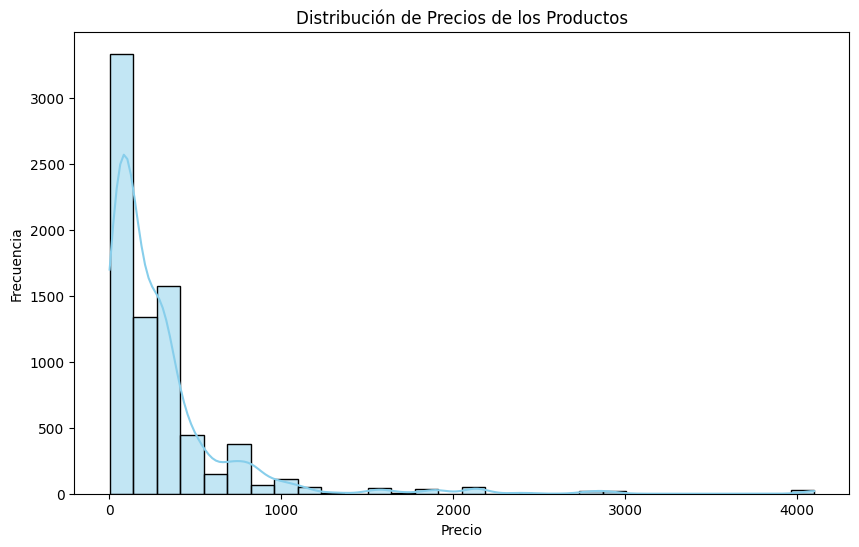

In [48]:
# Gráfico 1: Distribucion de Precios de Los Productos

import seaborn as sns
import matplotlib.pyplot as plt

# Título del gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df['precio'], bins=30, kde=True, color='skyblue')
plt.title("Distribución de Precios de los Productos")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


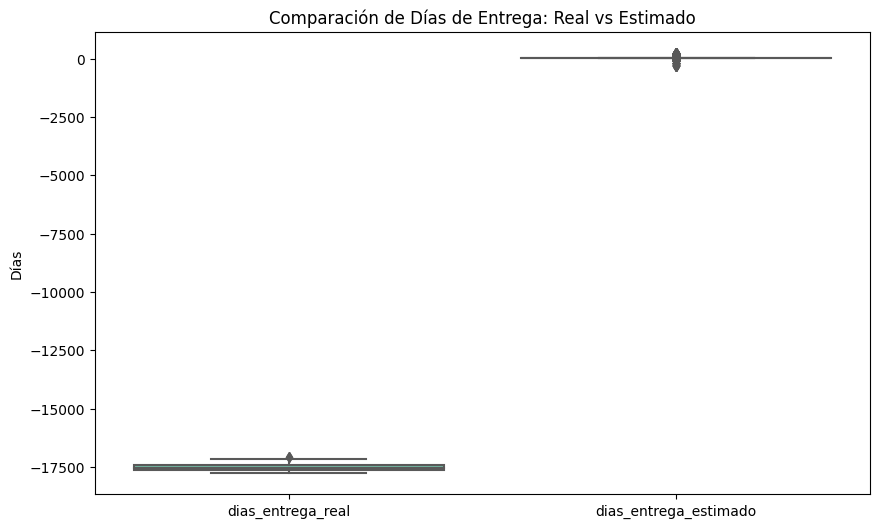

In [49]:
# Gráfico 2: Comparación de Días de Entrega: Real vs Estimado

# Calcular las diferencias entre fechas
df['dias_entrega_real'] = (df['delivered'] - df['purchased']).dt.days
df['dias_entrega_estimado'] = (df['estimated_delivery'] - df['purchased']).dt.days

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['dias_entrega_real', 'dias_entrega_estimado']], palette="Set2")
plt.title("Comparación de Días de Entrega: Real vs Estimado")
plt.ylabel("Días")
plt.show()


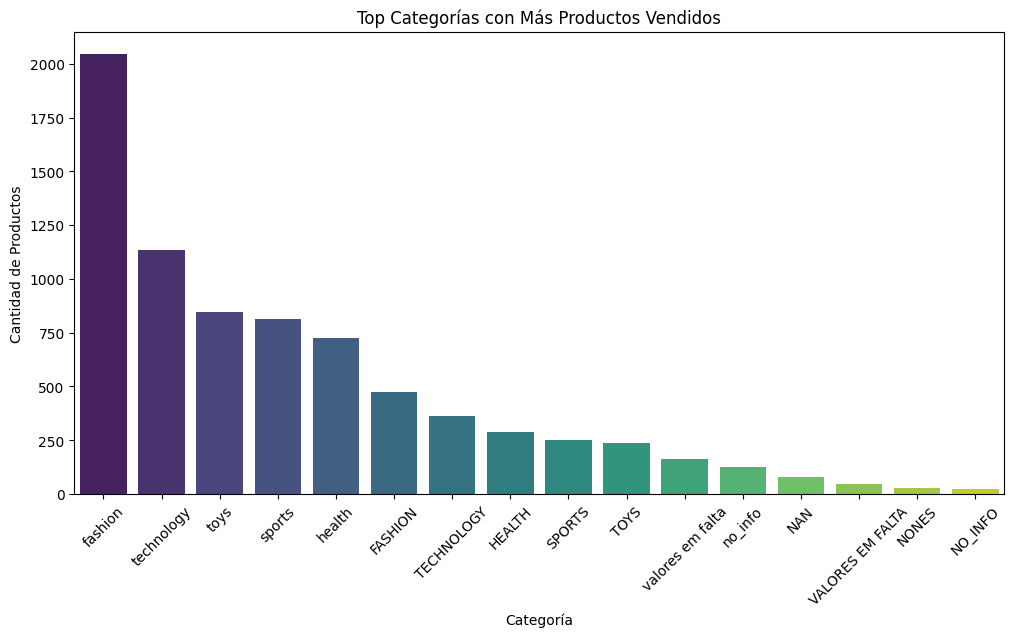

In [50]:
# Gráfico 3: Top Categorías con Más Productos Vendidos

# Contar la cantidad de productos por categoría
categoria_counts = df['category'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette="viridis")
plt.title("Top Categorías con Más Productos Vendidos")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Productos")
plt.xticks(rotation=45)
plt.show()


# 4. Se pide un informe con 3 estadísticas MUY interesantes y NUEVAS de los datos.

📖 **Referencia Externa:** [Pandas Data Analysis](https://medium.com/@anshulika12/deep-dive-into-pandas-and-numpy-advanced-data-analysis-techniques-3b381ad31785).

---

✅ **Explicación:**

**Estadística 1:** Promedio del tiempo entre la compra y la entrega de productos. Esto permitirá al CEO evaluar la eficiencia del proceso de logística y encontrar oportunidades de mejora para reducir los tiempos de entrega y mejorar la satisfacción del cliente.

**Estadística 2:** Proporción de productos entregados a tiempo según categoría. Ayuda a identificar las categorías con más problemas de entrega, permitiendo enfocar esfuerzos en esas áreas.

**Estadística 3:** Promedio del rating por categoría de producto. Esto le da al CEO una visión de cuáles categorías son mejor valoradas por los clientes, lo que puede influir en decisiones de inventario y estrategias de marketing.

In [51]:
# Estadística 1: Tiempo promedio entre compra y entrega real por categoría

# Calcular el tiempo entre 'purchased' y 'delivered'
df['dias_entrega_real'] = (df['delivered'] - df['purchased']).dt.days

# Agrupar por 'category' y calcular el promedio
tiempo_promedio_por_categoria = df.groupby('category')['dias_entrega_real'].mean().reset_index()

# Mostrar la estadística
print("Tiempo promedio entre compra y entrega real por categoría:")
print(tiempo_promedio_por_categoria)


Tiempo promedio entre compra y entrega real por categoría:
            category  dias_entrega_real
0            FASHION      -17527.792812
1             HEALTH      -17513.696552
2                NAN      -17575.283951
3              NONES      -17479.428571
4            NO_INFO      -17515.652174
5             SPORTS      -17559.984064
6         TECHNOLOGY      -17524.098901
7               TOYS      -17485.772152
8   VALORES EM FALTA      -17566.653061
9            fashion      -17559.356968
10            health      -17536.979282
11           no_info      -17541.843750
12            sports      -17545.326781
13        technology      -17527.095070
14              toys      -17522.111111
15  valores em falta      -17534.509091


In [52]:
# Estadística 2: Promedio y desviación estándar de precios por rating

# Agrupar por 'rating' y calcular el promedio y la desviación estándar del precio
precio_por_rating = df.groupby('rating')['precio'].agg(['mean', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
precio_por_rating.columns = ['rating', 'precio_promedio', 'desviacion_precio']

# Mostrar la estadística
print("Promedio y desviación estándar de precios por rating:")
print(precio_por_rating)


Promedio y desviación estándar de precios por rating:
   rating  precio_promedio  desviacion_precio
0     1.0       120.818334         171.316992
1     1.5       200.822984         445.723667
2     2.0       330.045241         525.381857
3     2.5       277.110573         393.094855
4     3.0       380.314443         399.665457
5     3.5       344.535490         317.994149
6     4.0       337.353641         326.059812
7     4.5       457.174529         594.992938
8     5.0       571.633383         575.213769


In [53]:
# Estadística 3: Porcentaje de productos entregados a tiempo

# Crear una columna que indica si la entrega fue a tiempo
df['entrega_a_tiempo'] = df['delivered'] <= df['estimated_delivery']

# Calcular el porcentaje de entregas a tiempo
porcentaje_a_tiempo = df['entrega_a_tiempo'].mean() * 100

# Mostrar la estadística
print("Porcentaje de productos entregados a tiempo:")
print(f"{porcentaje_a_tiempo:.2f}%")


Porcentaje de productos entregados a tiempo:
100.00%


# 5. [ ERROR ] Se detecto que el rating va de 1-5, pero los sistemas solo toleran ratings normalizados. En este caso ¿Que hay que hacer?

📖 **Referencia Externa:** [Normalization](https://www.geeksforgeeks.org/data-normalization-with-pandas/).

✅ **Explicación:**

- **¿En qué casos utilizarías normalización?** La normalización se utiliza cuando queremos escalar los datos en un rango fijo (por ejemplo, 0 a 1). Es útil en casos donde todas las variables tienen la misma importancia y queremos compararlas directamente, como en algoritmos basados en distancias (K-means, KNN).

- **¿En qué casos utilizarías estandarización?**  La estandarización es adecuada cuando las variables tienen diferentes unidades o distribuciones, pero deseamos que tengan una media de 0 y una desviación estándar de 1. Esto es común en algoritmos que asumen datos normalizados (SVM, PCA).

- **¿Qué otra columa del DataFrame crees que se podría normalizar o estandarizar?** La columna price_shipping_rate podría normalizarse para evaluar de forma consistente la relación entre el precio del producto y el costo del envío, eliminando el impacto de las diferencias en escalas. Esto permitiría comparar productos de distintas categorías de manera equitativa.

In [54]:
# Normalización

minmax = MinMaxScaler()
df['minmax_rating'] = minmax.fit_transform(df[['rating']])

In [55]:
# Estandarización

std = StandardScaler()
df['std_rating'] = std.fit_transform(df[['rating']])

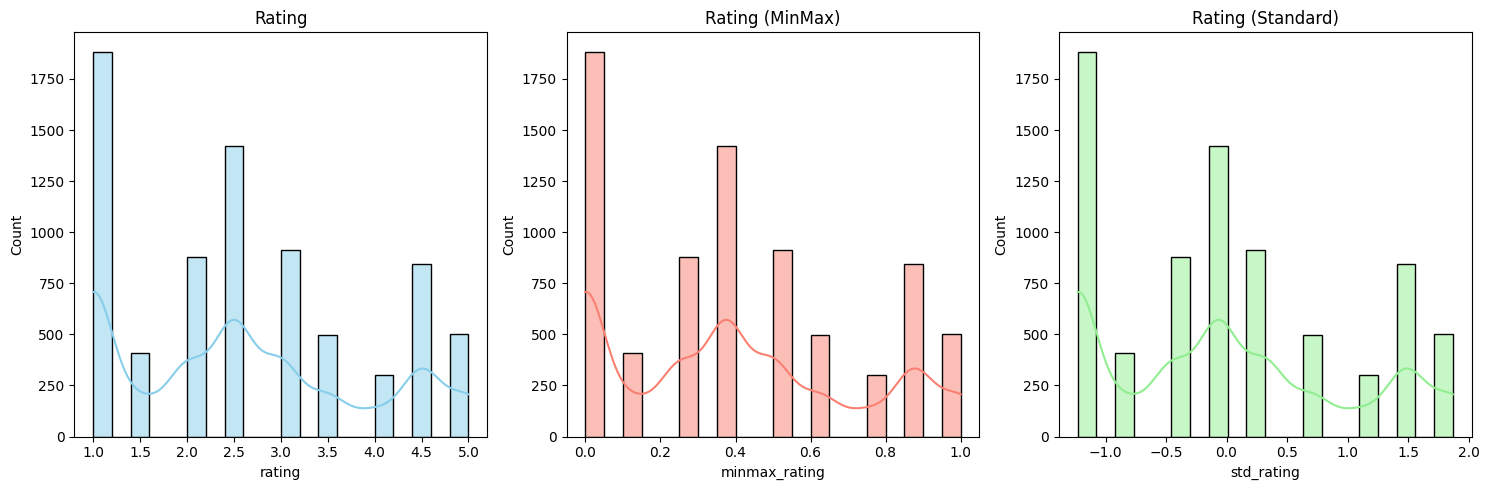

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df.rating, kde=True, ax=ax[0], color='skyblue')
sns.histplot(df.minmax_rating, kde=True, ax=ax[1], color='salmon')
sns.histplot(df.std_rating, kde=True, ax=ax[2], color='lightgreen')

ax[0].set_title('Rating')
ax[1].set_title('Rating (MinMax)')
ax[2].set_title('Rating (Standard)')

plt.tight_layout()
plt.show()

# 6. El CEO está interesado en simplificar el análisis de datos complejos sin perder información crucial. ¿Puedes aplicar una técnica de reducción de dimensionalidad como PCA y explicar los resultados?

📖 **Referencia Externa:** [Python PCA](https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/).

✅ **Explicación:**

El PCA permite reducir la cantidad de variables manteniendo la mayor parte de la información relevante. Esto simplifica el análisis y ayuda a identificar patrones clave, como agrupaciones o tendencias según variables como rating.

In [61]:
print(df.columns)

Index(['order', 'product', 'precio', 'category', 'purchased', 'delivered',
       'estimated_delivery', 'rating', 'customer_order', 'dias_entrega_real',
       'dias_entrega_estimado', 'entrega_a_tiempo', 'minmax_rating',
       'std_rating', 'purchase_hour', 'delivery_hour', 'purchase_weekday',
       'delivery_weekday'],
      dtype='object')


In [ ]:
# Hora de compra y entrega.
df['purchase_hour'] = df.purchased.dt.hour
df['delivery_hour'] = df.delivered.dt.hour

# Día de la semana de compra y entrega.
df['purchase_weekday'] = df.purchased.dt.weekday
df['delivery_weekday'] = df.delivered.dt.weekday

# Precio del producto versus precio del envío.
df['price_shipping_rate'] = df.precio/(df.precio+df.shipping)

# Precio y envío ajustados por los percentiles 20 y 80.
df['pricing_clipped'] = df.precio.clip(df.precio.quantile(0.2), df.precio.quantile(0.8))
df['shipping_clipped'] = df.shipping.clip(df.shipping.quantile(0.2), df.shipping.quantile(0.8))

In [70]:
# ¿Qué columnas deberíamos considerar para un análisis de componentes principales?

cols_pca = ['precio', 'rating']
# ¿Qué método de escalamiento deberíamos utilizar?

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[cols_pca]), columns=cols_pca)
df_scaled.head(3)

,precio,rating
0,0.911882,1.095392
1,0.911882,1.095392
2,0.911882,1.095392


In [72]:
# Genera un modelo de PCA con 2 componentes y ajusta el modelo a los datos escalados.

pca = PCA(n_components=2)
df[['component_1', 'component_2']] = pca.fit_transform(df_scaled)
df.head(3)

,order,product,precio,category,purchased,delivered,estimated_delivery,rating,customer_order,dias_entrega_real,dias_entrega_estimado,entrega_a_tiempo,minmax_rating,std_rating,purchase_hour,delivery_hour,purchase_weekday,delivery_weekday,component_1,component_2
0,18.0,7,692.0,health,2017-03-07 19:19:19,1970-01-01 05:36:10.321104153,2017-03-31 00:36:28.585304866,4.0,18,-17233,23,True,0.75,1.095392,19,5,1,3,1.419357,-0.129762
1,18.0,7,692.0,health,2017-03-07 19:19:19,1970-01-01 05:36:10.321104153,2017-03-31 00:36:28.585304866,4.0,18,-17233,23,True,0.75,1.095392,19,5,1,3,1.419357,-0.129762
2,18.0,7,692.0,HEALTH,2017-03-07 19:19:19,1970-01-01 05:36:10.321104153,2017-03-31 00:36:28.585304866,4.0,18,-17233,23,True,0.75,1.095392,19,5,1,3,1.419357,-0.129762


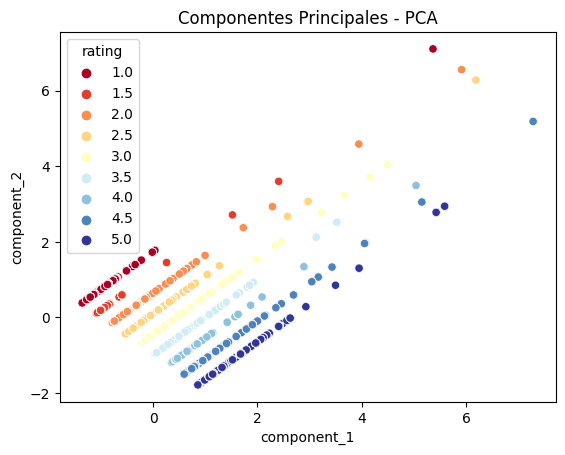

In [73]:
# Gráfico de componentes principales según rating.

sns.scatterplot(
    data=df,
    x= 'component_1',
    y= 'component_2',
    hue= 'rating',
    palette='RdYlBu',
    legend='full'
)

plt.title('Componentes Principales - PCA')
plt.show()

In [74]:
# ¿Cuánta varianza explica cada componente?

print(f'Varianza explicada por cada componente: {pca.explained_variance_ratio_}')
print(f'Varianza explicada total: {sum(pca.explained_variance_ratio_)}')

Varianza explicada por cada componente: [0.64298842 0.35701158]
Varianza explicada total: 1.0
